#Анализ причин выжимаемости на Титанике
В качестве первого домашнего задания Вам предстоит сформулировать и проверить гипотезы о причинах выживаемости на Титанике. Необходимые данные можно найти на GitHub курса, описание к данным на сайте соревнований по анализу данных [Kaggle](https://www.kaggle.com/c/titanic/data).

Критерии оценивания:

- Четко сформулированы гипотезы и выводы из них
- Гипотез не меньше 3-х
- Присутствуют кросс-признаковые гипотезы (например, процент выживаемости среди молодых женщин: пол + возраст)
- Использованы группировки .groupby() с агрегированием .aggregate(), трансформацией .transform() или фильтрацией .filter() данных
- Присутствует визуализация
- Присутствует общий вывод исследования

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/IgorBio/sberbank_data_analysis_06_07_21/master/data/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


В предположении о влиянии на выживаемость признака "Стоимость билета" сформулированы кросс-признаковые гипотезы в связке с Fare, разбитым на интервалы в соответствии с распределением.

In [3]:
df['Fare_quantils'] = pd.qcut(df['Fare'], 7)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_quantils
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(-0.001, 7.75]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(56.929, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(7.75, 8.05]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(27.9, 56.929]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(7.75, 8.05]"


###Гипотеза 1
Формулировка: Доля выживших среди мужчин и женщин растет вместе со стоимостью билета. Меньшая доля выживших в сегменте  "Мужчины + недорогие билеты", наибольшая в сегменте "Женщины + дорогие билеты"

In [4]:
fare_sex = df.groupby(['Sex', 'Fare_quantils'])['Survived'].aggregate([np.mean, 'count', np.sum]).reset_index()
fare_sex

,Sex,Fare_quantils,mean,count,sum
0,female,"(-0.001, 7.75]",0.724138,29,21
1,female,"(7.75, 8.05]",0.590909,22,13
2,female,"(8.05, 12.475]",0.617647,34,21
3,female,"(12.475, 19.258]",0.690909,55,38
4,female,"(19.258, 27.9]",0.714286,56,40
5,female,"(27.9, 56.929]",0.690476,42,29
6,female,"(56.929, 512.329]",0.934211,76,71
7,male,"(-0.001, 7.75]",0.072072,111,8
8,male,"(7.75, 8.05]",0.130081,123,16
9,male,"(8.05, 12.475]",0.156250,64,10


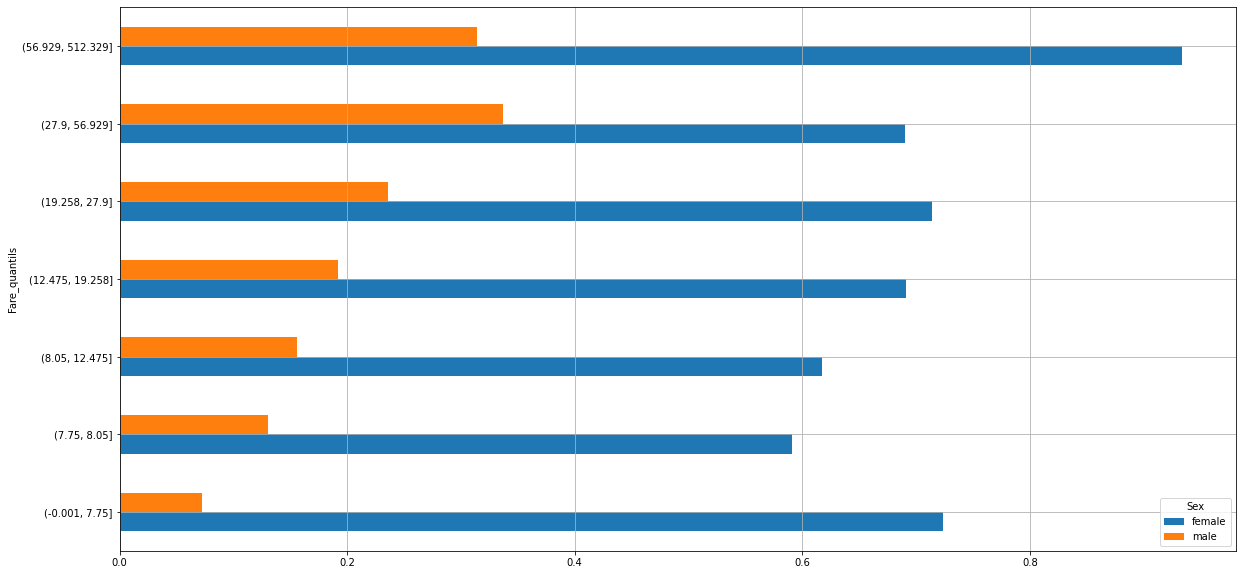

In [5]:
fare_sex.pivot(index='Fare_quantils', values='mean', columns='Sex').plot(kind='barh', stacked=False, figsize=(20, 10), grid=True)

Вывод: В целом предположение подтвержается, вместе с ценой билета растут шансы на выживание как среди мужчин, так и среди женщин. Исключением является сегмент "Женщины + недорогие билеты", в котором относительно высокая доля выживших обусловлена другими причинами.

###Гипотеза 2
Формулировка: Доля выживших в различных возрастных группах растет вместе со стоимостью билета. Меньшая доля выживших в сегменте  "Старший возраст + недорогие билеты", наибольшая в сегменте "Младший возраст + дорогие билеты"

In [6]:
age = pd.cut(df['Age'], [0, 18, 40, 80])
fare_age = df.groupby([age, 'Fare_quantils'])['Survived'].aggregate([np.mean, 'count', np.sum]).reset_index()
fare_age.tail()

,Age,Fare_quantils,mean,count,sum
16,"(40, 80]","(8.05, 12.475]",0.363636,11,4
17,"(40, 80]","(12.475, 19.258]",0.222222,18,4
18,"(40, 80]","(19.258, 27.9]",0.433333,30,13
19,"(40, 80]","(27.9, 56.929]",0.310345,29,9
20,"(40, 80]","(56.929, 512.329]",0.638889,36,23


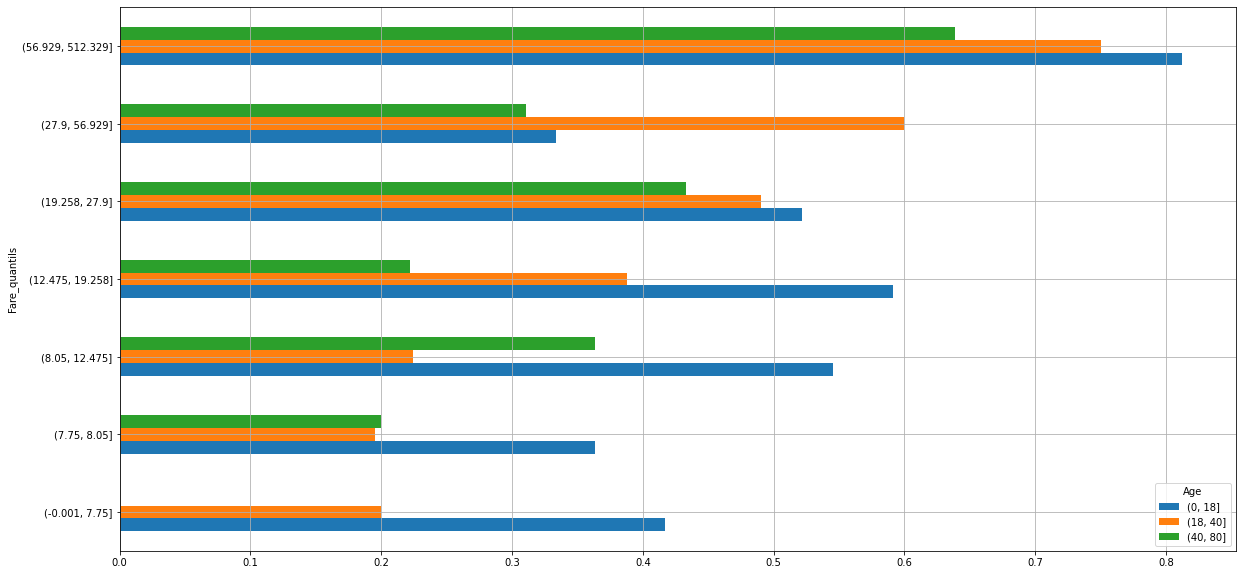

In [7]:
fare_age.pivot(index='Fare_quantils', values='mean', columns='Age').plot(kind='barh', stacked=False, figsize=(20, 10), grid=True)

Вывод: В целом предположение подтвержается, вместе с ценой билета растут шансы на выживание во всех возрастных группах.

###Гипотеза 3
Формулировка: Доля выживших внутри групп пассажиров с одинаковым местом посадки растет вместе со стоимостью билета.

In [8]:
fare_embarked = df.groupby(['Embarked', 'Fare_quantils'])['Survived'].aggregate([np.mean, 'count', np.sum]).reset_index()
fare_embarked.tail()

,Embarked,Fare_quantils,mean,count,sum
16,S,"(8.05, 12.475]",0.287356,87,25
17,S,"(12.475, 19.258]",0.377778,90,34
18,S,"(19.258, 27.9]",0.441441,111,49
19,S,"(27.9, 56.929]",0.445652,92,41
20,S,"(56.929, 512.329]",0.600000,65,39


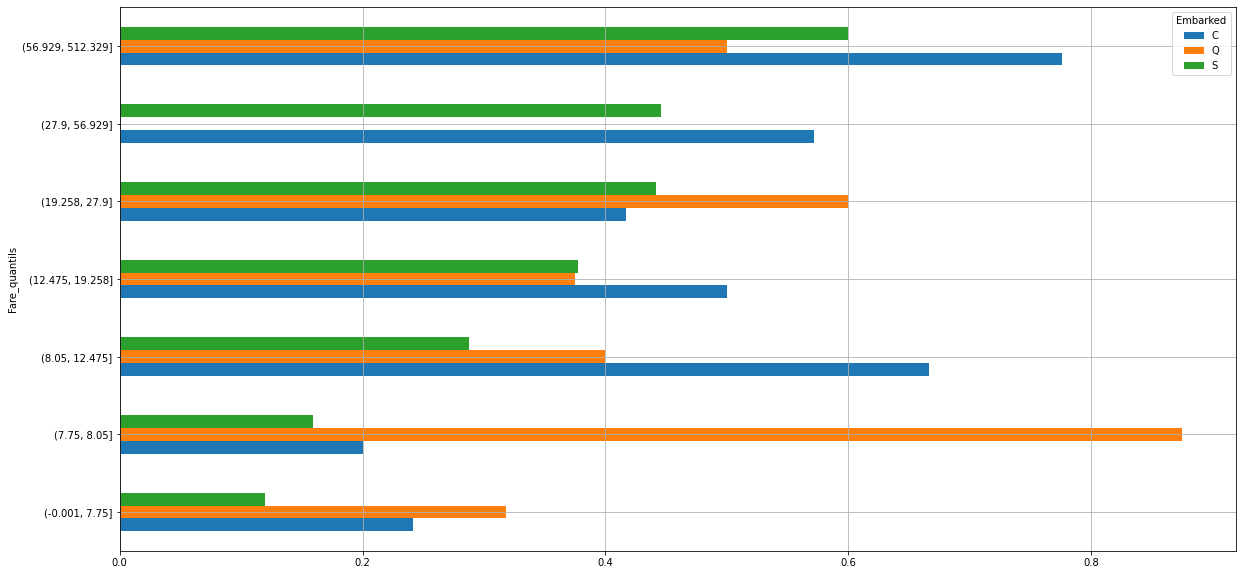

In [9]:
fare_embarked.pivot(index='Fare_quantils', values='mean', columns='Embarked').plot(kind='barh', stacked=False, figsize=(20, 10), grid=True)

Вывод: Для портов Queenstown и Cherbourg гипотеза не подтвеждается в полной мере, возможно это связано с относительно небольшим количеством пассажиров из этих локаций, возможно с особенностями размещения на судне. Для 644 пассажиров из Southampton гипотеза подтверждена.

##Вывод исследования:
С помощью проверки данных 3х гипотез можно сделать выводы:
- признак "Стоимость билета" в большой мере объясняет причины выживаемости на Титанике
- кросс-признаковый характер формулирования гипотез показал, что существуют другие причины, влияющие на целевую переменную